In [2]:
import qutip, pickle, sys
import matplotlib.pyplot as plt 
import numpy as np
import scipy.optimize as opt 
import scipy.linalg as linalg
import time as time
import math, cmath
import Max_Ent_aux_lib as melib
#import proj_ev_library as projev
#import max_entev library as meev
from IPython.display import display, Math, Latex

np.set_printoptions(threshold=1.e-3,linewidth=120,precision=1, formatter={"float":lambda x: str(.001*int(1000*x)) })

Tenemos la siguiente ecuaciÃ³n de movimiento:
{
$$
    \dot{c}_M(t) I_{M}^{0}(t) = -i \bigg\{\bigg(c_{M+2}(t) - c_M(t) \bigg)\langle \rho_{M}^{0\dagger}(t) [H_{0,-2}, \rho_{M+2}^0] \rangle + \bigg(c_{M-2}(t) - c_M(t)\bigg) \langle \rho_{M}^{0\dagger}(t) [H_{0,2}, \rho_{M-2}^0] \rangle + p \langle \rho_{M}^{0\dagger}(t) [\Sigma, \rho_{M}^0 (t)]\rangle \bigg\}
$$

siendo $I_{M}^{0}(t) = \langle \rho_{M}^{0\dagger}(t) \rho_{M}^{0}(t)\rangle = I_{-M}^{0}(t)$
la cual puede reescribirse como 

$$
\dot{c}_M(t) I_{M}^{0}(t) = -i \bigg\{A_{\rho^{M, M+2}} c_{M+2}(t) - \bigg(A_{\rho^{M, M+2}} + B_{\rho^{M, M-2}} \bigg) c_{M}(t) + B_{\rho^{M, M-2}} c_{M-2}(t) \bigg\} + p C_{\rho^M} \\
= - i{\bf{\mathcal{M}}}(t) \textbf{c}(t)
$$

donde 

<ol>

<li> $A_{\rho^{M, M+2}} = \langle \rho_{M}^{0\dagger}(t) [H_{0,-2}, \rho_{M+2}^0] \rangle$ </li> 
<li> $B_{\rho^{M, M-2}} = \langle \rho_{M}^{0\dagger}(t) [H_{0,2}, \rho_{M-2}^0] \rangle$ </li>
<li> $C_{\rho^M} = \langle \rho_{M}^{0\dagger}(t) [\Sigma, \rho_{M}^0 (t)]\rangle$ </li>
    
</ol>    

Entonces, si $f(t) = \langle \rho(t) \rho^0(t) \rangle = \sum_{M} \dot{c}_M(t) I_{M}^{0}(t)$

$$
    \dot{f}(t) = \sum_{M} \bigg(\dot{c}_M(t) I_{M}^{0}(t) + {c}_M(t) \dot{I}_{M}^{0}(t) \bigg)
$$

In [5]:
1: A=alpha * B=N(t) * exp(m * t**(-a)) = I_M**(0) (a primer orden alpha = 1) 
2: hacer la matriz hermìtica
3: C = M * N(t) * exp(m * t**(-a))
    
K(t,t') = e**(-i M(t-t')) 
    
con N(t) = 1/Tr(rho(t)) la calculo con la definición del rho_M = sum_{M} c_M(t) 

SyntaxError: invalid syntax (1270290635.py, line 1)

In [3]:
total_no_spins = 10000 ### este es el nÃºmero de spines en el lattice
coherences_t0_pert0 = 1. ### el coeficiente I_m^0(t) inicial, son las coherencias a tiempo 0 sin perturbaciÃ³n. Modificar dsps.
coeff_list_t0 = [coherences_t0_pert0 + np.random.rand() for i in range(total_no_spins)] ### una configuraciÃ³n inicial 
p = .5 ### el tÃ©rmino que pondera el avg del hamiltoniano del estado inicial con la perturbacion
#cmts_at_t0 = [1] + [np.random.rand() for i in range(49)]

M_tensor = np.array(melib.generating_function_M_matrix(total_no_spins, coeff_list_t0, [1.], False))

melib.M_matrix_test(total_no_spins, M_tensor)

In [4]:

qutip.Qobj(M_tensor)

Quantum object: dims = [[10000], [10000]], shape = (10000, 10000), type = oper, isherm = False
Qobj data =
[[-1.0 0.0 7.389 ... 0.0 0.0 0.0]
 [0.0 0.264 0.0 ... 0.0 0.0 0.0]
 [0.018000000000000002 0.0 0.729 ... 0.0 0.0 0.0]
 ...
 [0.0 0.0 0.0 ... 1.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 1.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 1.0]]

(<Figure size 576x432 with 2 Axes>, <AxesSubplot:>)

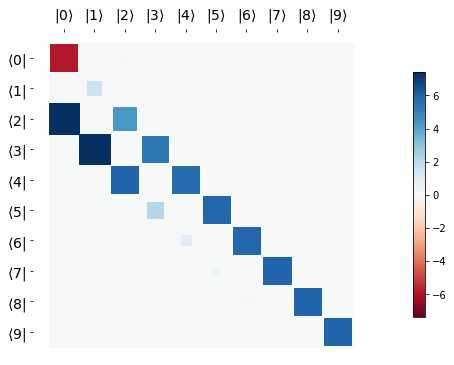

In [16]:
qutip.hinton(qutip.Qobj(M_tensor))

In [17]:
def A_rho_m_mplus2(m):
    return np.e**(-m)

def B_rho_m_mminus2(m):
    return np.e**(-m)

In [18]:
def generating_function_M_matrix(total_no_spins, cmt0_coeff_list, param_list, cbc = False):
    
    cm_list = cmt0_coeff_list
    m_matrix_list = []
    M = total_no_spins
    
    p = param_list[0]
    
    for m in range(M):
        if m == 0:
            a = [-np.e**(-m) - np.e**(-m) + p ** np.e**(-0)] + [0]
                                    + [np.e**(-m+2)] + [0 for k in range(M-3)]
            if cbc:
                a = [-np.e**(-m) - np.e**(-m) + p ** np.e**(-0)] + [0]
                                    + [np.e**(-m+2)] + [0 for k in range(M-1)] + [B_rho_m_mminus2(m)] + [0]
            m_matrix_list.append(())    
        if m == 1:
            local_list = [0] + [-np.e**(-m) - np.e**(-m) + p ** np.e**(-0)] + [0] + [np.e**(-m+2)]
            local_length = len(local_list)
            m_matrix_list.append(local_list + [0 for k in range(M-local_length)])
        if (m > 1) and (m < M - 2):  
            local_list = [0 for j in range(m-2)]; local_length = len(local_list)
            local_list += [np.e**(-m-2)] + [0] + [-np.e**(-m) - np.e**(-m) + p ** np.e**(-0)] + [0] + [np.e**(-m+2)]
            local_list += [0 for j in range(M-local_length - 5)]
            m_matrix_list.append(local_list)
        if m == total_no_spins - 2: 
            m_matrix_list.append([0 for i in range(m-2)] + [np.e**(-m-2)] + [0] + [-np.e**(-m) - np.e**(-m) + p ** np.e**(-0)] 
                                     + [0])
        if m == total_no_spins - 1:
            m_matrix_list.append([0 for i in range(m-2)] + [np.e**(-m-2)] + [0] + [-np.e**(-m) - np.e**(-m) + p ** np.e**(-0)])
            
    else:
        pass 
    
    return (m_matrix_list)

IndentationError: unexpected indent (862044941.py, line 12)

In [ ]:
# Si la matrix M(t) = M para todo t, uso la propiedad de semigrupo y ya fue

def semigroup_phit_and_rhot_sol(coeff_list_t0, Mtensor, ts):
    coeff_at_timet_list = []
    coeff_at_timet_list.append(np.array(coeff_list_t0))
    
    for i in range(1, len(ts)-1):
        try: 
            a = (ts[i+1] * Mtensor).expm() * coeff_list_t0[0]
            coeff_at_timet_list.append(a)
        #if (Exception):
        #   continue 
    return coeff_at_timet_list    

# Si la matrix M(t) fuese no constante, odeint

from scipy.integrate import ode
import random

def F(y, t, Mtensor):
    return Mtensor.dot(y)

real_Mtensor = (np.real(Mtensor))
ts1 = np.linspace(0, 500, 200)
result = odeint(func=F, y0=coeff_list_t0, t= ts1 , args=(real_Mtensor,))
plt.figure(figsize=(7, 4))

for i in range(len(total_no_spins)):
    plt.plot(ts1, result[:,i], label=r'$c_{(%d)}(t)$'%i)

plt.xlabel("t")
plt.ylabel("Phi(t)")
plt.legend()



# Legacy

In [12]:
#import simpy no hace falta

total_no_spins = 49 ### este es el nÃºmero de spines en el lattice
coherences_t0_pert0 = 1. ### el coeficiente I_m^0(t) inicial, son las coherencias a tiempo 0 sin perturbaciÃ³n. Modificar dsps.
coeff_list_t0 = [coherences_t0_pert0 + np.random.rand() for i in range(total_no_spins)] ### una configuraciÃ³n inicial 
p = .5 ### el tÃ©rmino que pondera el avg del hamiltoniano del estado inicial con la perturbacion
#cmts_at_t0 = [1] + [np.random.rand() for i in range(49)]

### Este mÃ³dulo construye la matrix que relaciona los coeficientes c_m(t). Es re contra fea pero it gets the job done

def construct_M_matrix(coeff_list):
    m_matrix_list = []
    ith_cmt_list = []
    M = total_no_spins
    
    ### La ec de markov la podemos escribir como d/dt(C(t)) = -i/I_M^0(t) * M (C(t))
    
    ### la macana es que, con condiciones de borde libres, tengo que cargar a mano los dos primeros y dos Ãºltimos cm(t)s
    ### del lattice. Capaz con un condiciones periÃ³dicas, pensÃ¡ndo la lattice como un Toro T_1, queda mÃ¡s lindo.
    
    m_matrix_list.append(coeff_list[0+2]-coeff_list[0] * np.e**(-0) - (coeff_list[0]) * np.e**(-0) + p * np.e**(-0))
    m_matrix_list.append((coeff_list[1+2]-coeff_list[1]) * np.e**(-1) - (coeff_list[1]) * np.e**(-1)
                       + p * np.e**(-1))
    
    for i in range(2, len(coeff_list) - 2):
        a = (coeff_list[i+2]-coeff_list[i]) * np.e**(-i) + (coeff_list[i-2]-coeff_list[i]) * np.e**(-i) + p * np.e**(-i)
        m_matrix_list.append(a) 
        
    
    m_matrix_list.append((coeff_list[M-2+2-1]-coeff_list[M-2-1]) * np.e**(-(M-2-1)) 
                            - (coeff_list[M-2-2-1]-coeff_list[M-2-1]) * np.e**(-(M-2-1))
                       + p * np.e**(-(M-2-1)))
    
    m_matrix_list.append(-(coeff_list[M-1]) * np.e**(-(M-1)) 
                            - (coeff_list[M-1-2]-coeff_list[M-1]) * np.e**(-(M-1))
                       + p * np.e**(-(M-1)))
    
    m_matrix = np.array(m_matrix_list)
    
    return m_matrix#, m_matrix_list

Mij_matrix = construct_M_matrix(coeff_list_t0)

In [20]:
Mij_matrix

array([-7.16674346e-01, -5.90169624e-01,  1.21698489e-01,  4.81026125e-02,
        6.31353203e-03, -2.51689532e-03,  1.85198030e-04,  1.21991991e-03,
        5.06343237e-04,  6.14551116e-05, -7.23453325e-06,  5.63735127e-06,
       -1.16495815e-06,  7.22258777e-07,  8.17044402e-07,  1.90310080e-07,
        9.73740334e-08, -5.38454793e-09,  1.17394656e-08,  5.36103287e-09,
       -4.30804432e-10,  8.75511904e-10,  2.82353277e-11, -3.94635884e-11,
        4.84266306e-11,  2.40592032e-11,  7.42731834e-13, -2.31364049e-12,
        8.47879926e-13,  5.33238451e-13,  3.29473415e-15, -2.81244765e-14,
        4.42386492e-15,  6.60946827e-15,  1.16701582e-15, -1.08655614e-16,
       -8.27975324e-17,  7.69233729e-17,  5.81487599e-17,  6.35176095e-18,
       -3.87907203e-19,  7.40536971e-19, -1.03335779e-19,  5.66137864e-20,
        1.13789691e-19,  3.79809348e-20, -4.15140553e-22,  5.85889694e-21,
       -1.15054418e-21])